In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

### Data profiling

In [19]:
df = pd.read_csv("pandemic.csv")
df

,gender,age,BMI,hemoglobine,vaccination_status,hospitalization,UCI_admission,hosp_days,therapy,status
0,M,22,24,13,C,N,N,0,no,recovery
1,M,42,33,15,B,Y,Y,18,invasive,death
2,M,61,15,11,A,Y,Y,32,oxygen,recovery
3,M,69,21,16,A,Y,N,3,oxygen,recovery
4,F,34,33,9,D,Y,Y,5,oxygen,recovery
5,F,56,20,11,A,N,N,0,no,recovery
6,F,59,29,16,no,Y,Y,22,invasive,death
7,F,63,22,15,B,Y,N,9,oxygen,recovery


Normalization: standard and min-max scaling

In [12]:
bmi_mean, bmi_std = df.BMI.mean(), df.BMI.std()
df.BMI.apply(lambda x: (x-bmi_mean)/bmi_std)

0   -0.096460
1    1.292565
2   -1.485486
3   -0.559469
4    1.292565
5   -0.713805
6    0.675221
7   -0.405132
Name: BMI, dtype: float64

In [13]:
bmi_min, bmi_max = df.BMI.min(), df.BMI.max()
df.BMI.apply(lambda x: (x-bmi_min)/(bmi_max-bmi_min))

0    0.500000
1    1.000000
2    0.000000
3    0.333333
4    1.000000
5    0.277778
6    0.777778
7    0.388889
Name: BMI, dtype: float64

Visualizing the empirical distribution of categorical variables using bar charts

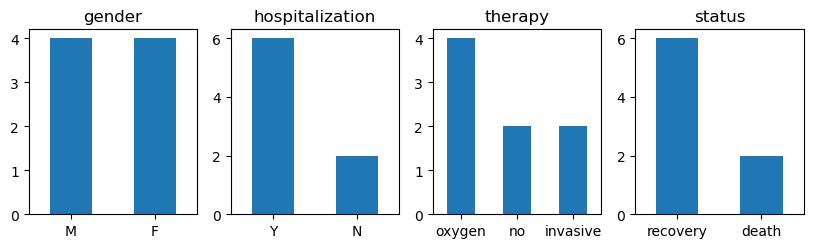

In [14]:
df = pd.read_csv("pandemic.csv")
fig, axes = plt.subplots(1,4,figsize=(10,2.4))
for i, col in enumerate(['gender','hospitalization','therapy','status']):
    df[col].value_counts().plot(kind='bar', title=col, rot=0, ax=axes[i])
plt.show()

Visualizing the empirical distribution of numeric variables using histograms

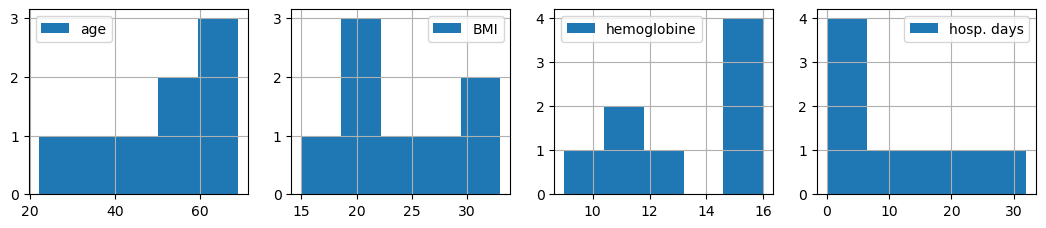

In [8]:
fig, axes = plt.subplots(1,4,figsize=(13,2.4))
for i, col in enumerate(['age','BMI','hemoglobine','hosp. days']):
    df[col].hist(bins=5, legend=True, ax=axes[i])
plt.show()

Identifying the bounds to detect outlier values

In [9]:
q1, q3 = df.BMI.quantile(0.25,interpolation='midpoint'), df.BMI.quantile(0.75,interpolation='midpoint')
IQR = q3-q1
print("bounds [",q1-1.5*IQR,",",q3+1.5*IQR,"]")

bounds [ 4.75 , 46.75 ]


Assessing linear and non-linear correlations

In [10]:
df[['BMI','hemoglobine','hosp. days']].corr(method='pearson')

,BMI,hemoglobine,hosp. days
BMI,1.000000,0.072548,-0.101125
hemoglobine,0.072548,1.000000,0.104532
hosp. days,-0.101125,0.104532,1.000000


In [11]:
df[['BMI','hemoglobine','hosp. days']].corr(method='spearman')

,BMI,hemoglobine,hosp. days
BMI,1.000000,0.091470,0.060241
hemoglobine,0.091470,1.000000,0.176842
hosp. days,0.060241,0.176842,1.000000


Visualizing class-conditional distributions

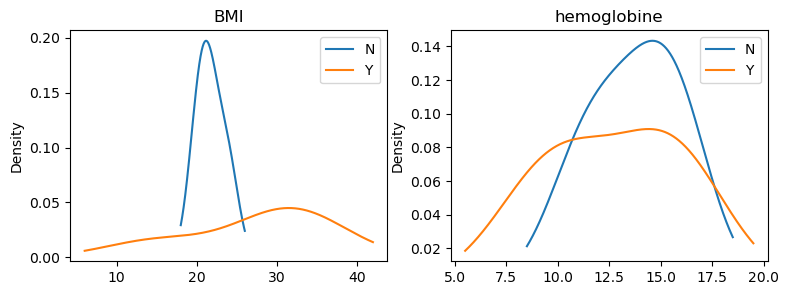

In [12]:
fig, axes = plt.subplots(1,2,figsize=(9,3))
for i, col in enumerate(['BMI','hemoglobine']):
    axes[i].set_title(col)
    df.groupby("UCI admission")[col].plot(kind='kde', legend=True, ax=axes[i])

### Gaussian essentials for Bayesian learning

In [ ]:
from scipy import stats

Univariate Gaussians (fitting and accessing pdf values)

In [41]:
for outcome in ['Y','N']:
    df_cond = df.loc[df.UCI_admission == outcome]
    normal = stats.norm(df_cond.BMI.mean(), df_cond.BMI.std())
    print("UCI=%s-conditional Gaussian for BMI with pdf(20)=%.3f" % (outcome, normal.pdf(20)))

UCI=Y-conditional Gaussian for BMI with pdf(20)=0.032
UCI=N-conditional Gaussian for BMI with pdf(20)=0.138


Multivariate Gaussians (fitting and accessing pdf values)

In [43]:
for outcome in ['Y','N']:
    df_cond = df.loc[df.UCI_admission == outcome]
    mean = [df_cond.BMI.mean(),df_cond.hemoglobine.mean()]
    cov = np.cov(df_cond[['BMI','hemoglobine']].T)
    multnorm = stats.multivariate_normal(mean, cov)
    print("UCI=%s-conditional Gaussian for (BMI,hemoglobine) with pdf(20,15)=%.3f" % (outcome, multnorm.pdf([20,15])))

UCI=Y-conditional Gaussian for (BMI,hemoglobine) with pdf(20,15)=0.003
UCI=N-conditional Gaussian for (BMI,hemoglobine) with pdf(20,15)=0.019
